<a href="https://colab.research.google.com/github/SantiagoArce7/CIENCIA_DATOS_2025/blob/main/EDA_Analisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Exploratorio de datos eda
Conjunto de de tecnicas

##Pasos del EDA
1. Realizar un analisis descriptivo de las variables
2. Rea ajustar tipos de varibles que no sean consitentes en el momento de realizar las operaciones
3. detectar datos ausentes y tratarlos
4. identififcar datos atipicos y tratarlos para mitigar la distorsión de futuros analisis estadisticos.
5. Realizar un examen númerico entre variabkes analizadas determinando su grado de correlación

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Analisi desctriptivo
Tomar cada una de las caracteristicas y analizarla

In [17]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Sobrevivientes','Muertos']
  test.plot(kind='bar',stacked=True,figsize=(10,5))

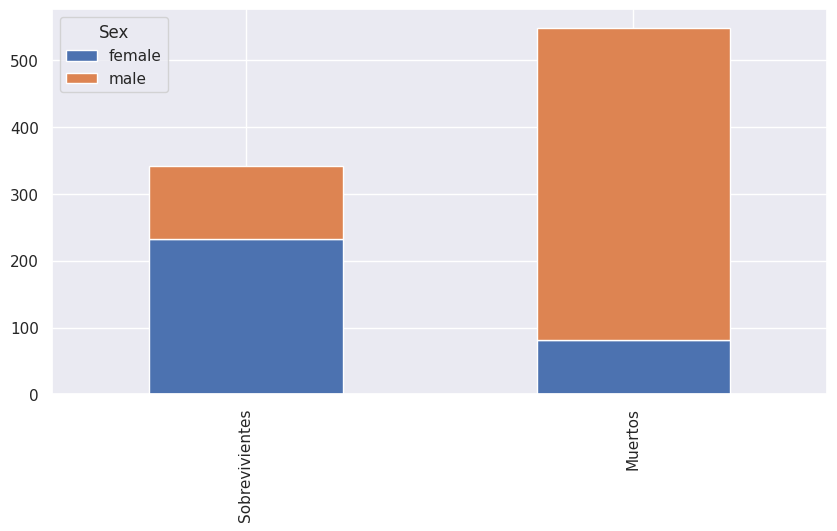

In [18]:
bar_char("Sex")

Las **mujeres** mostraron mayor tasa de supervivencia (casi del 60%) en comparación con los hombres

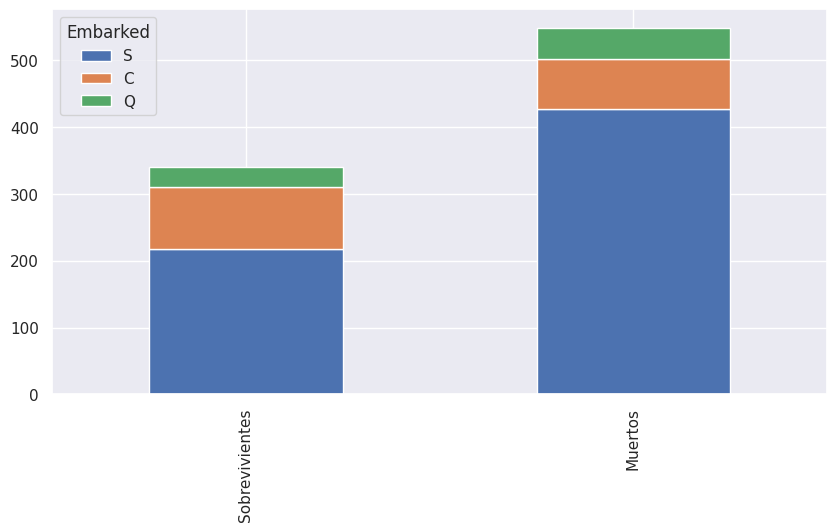

In [21]:
bar_char("Embarked")

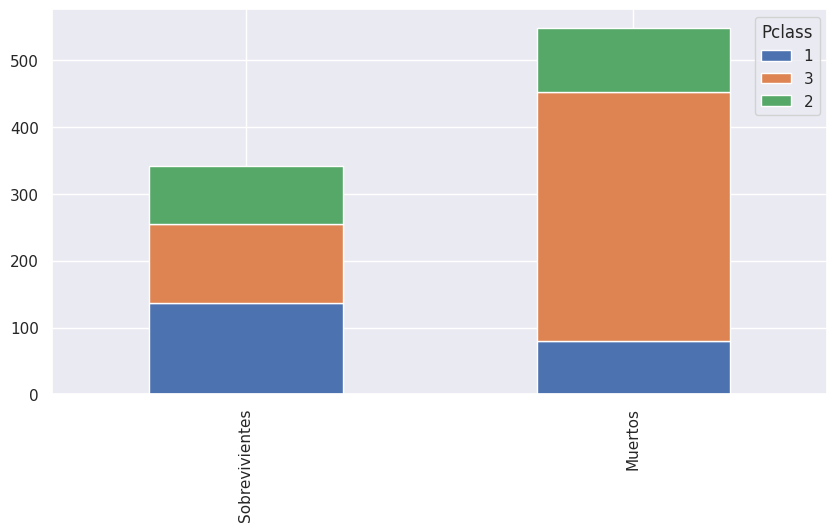

In [22]:
bar_char("Pclass")

Pclass tienen mayor probabilidad de sobrevivir con respecto a pclass 3


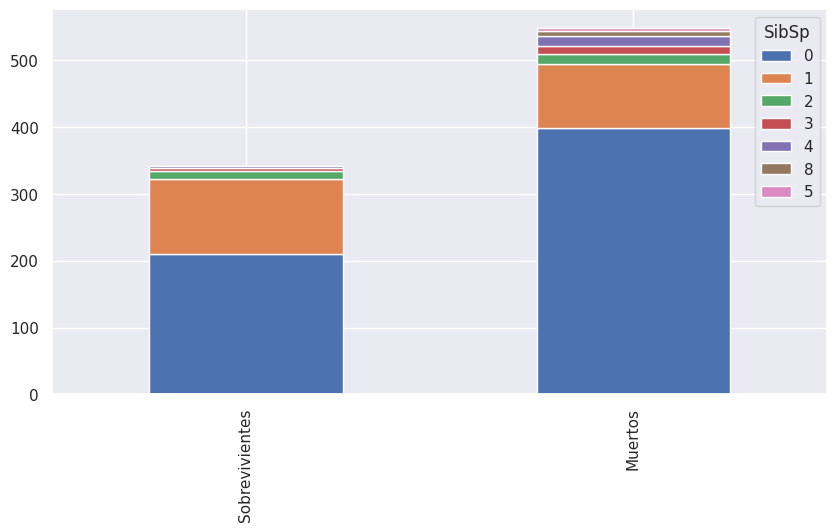

In [23]:
bar_char("SibSp")

Las personas solteras presentan menor probabilidad de supervivencia en comparación con aquellas casadas o con familia

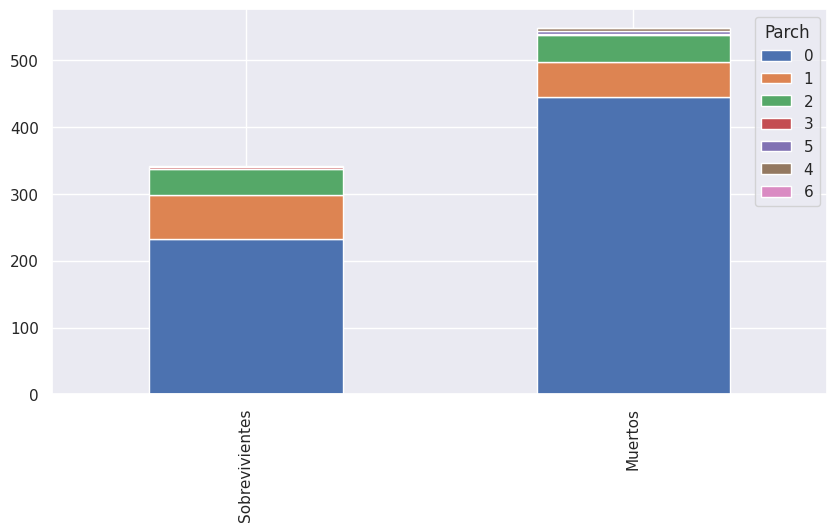

In [24]:
bar_char("Parch")

La grafica muestra que la probabilidad de suoervivencia aunmentaba si tenias entre uno y tres hijjos, disminuia si eres soltero o con mas de 3 hijos

#Ingeniería de ccarateristicas
Es el proceso de usar el dominio del conocimiento para crear nuevas carateristicas (Featrures vECTOORS) QUE LOGRE QUE LOS ALGORITMOS DE MACHINE LEARNING FUNCIONEN ADECUADAMENTE

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S


##2. Creando feature vectors

In [33]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [35]:
df["Title"]=extract_title(df)

In [36]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


###2.1 Creando un mapa de titulños
para ello reemplazamos los títulos con los siguientes valores
  Mr=0
  Miss:1
  Mrs:2
  Otros:3

In [47]:
def replace_titles(data):
  title_mapping={"Mr":0,"Miss":1,"Mrs":2}
  data["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

In [48]:
df=replace_titles(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


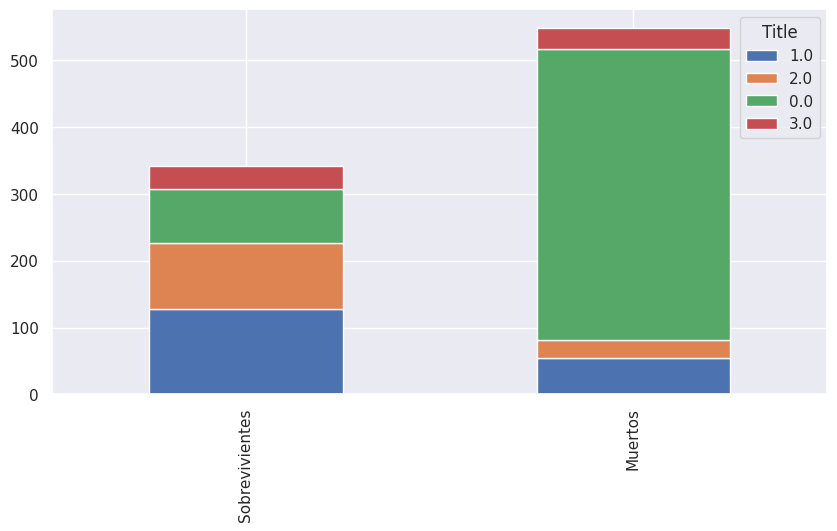

In [50]:
bar_char("Title")

##Eliminar la infomarción innecesaria

In [51]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,2.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,2.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0


In [52]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


In [54]:
df["Age"]=df.apply(lambda row:title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

In [55]:
df[["Title","Age"]].head(10)

,Title,Age
0,0.0,22.00000
1,2.0,38.00000
2,1.0,26.00000
3,2.0,35.00000
4,0.0,35.00000
5,0.0,32.36809
6,0.0,54.00000
7,3.0,2.00000
8,2.0,27.00000
9,2.0,14.00000


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


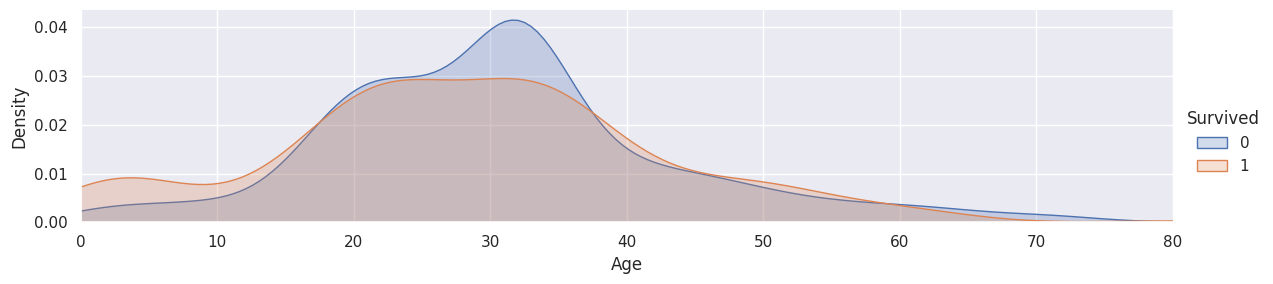

In [56]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


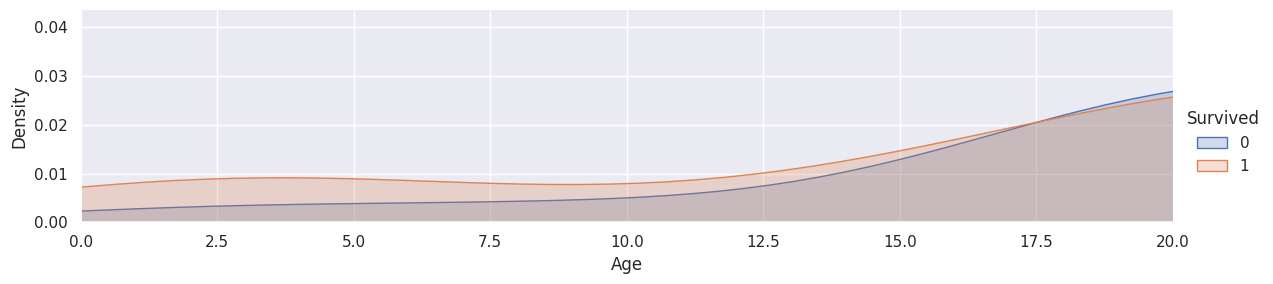

In [57]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


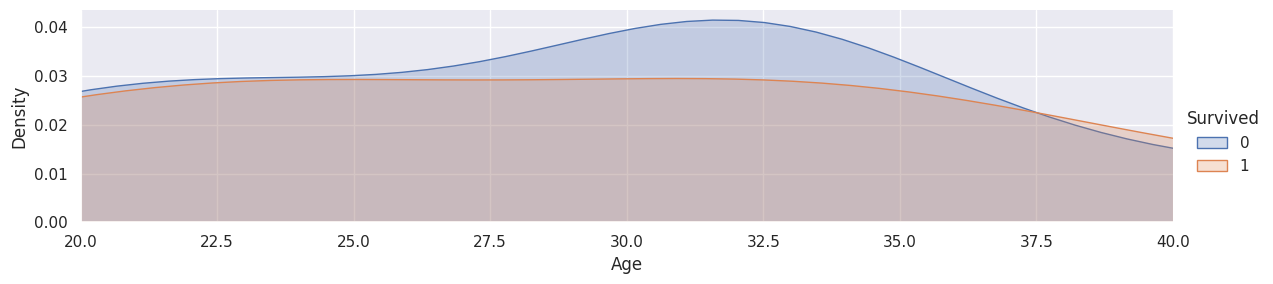

In [58]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


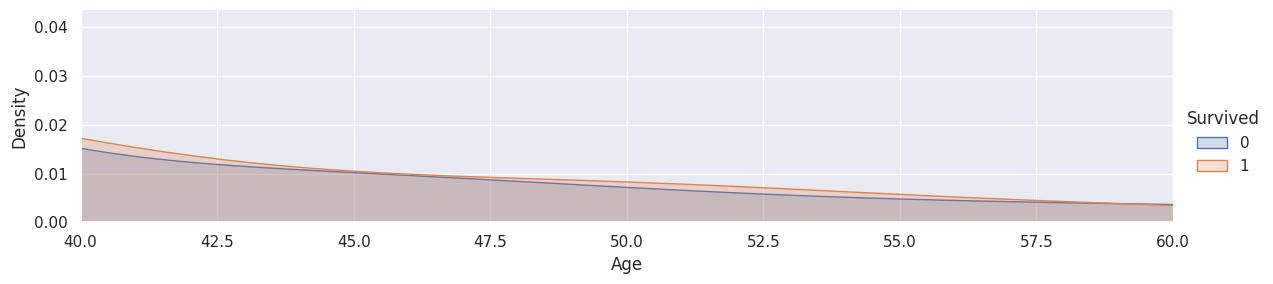

In [59]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(40,60)
plt.show()

##2.4 Binnig
Convertir una variable numerica a categorica, eb este caso, la edad
Mapear el feature vector
  Niños: 0
  Joven:1
  Adulto:2
  Edad madura:3
  Edad avanzada: 4

In [62]:
df["Age_category"]=pd.cut(df["Age"],bins=[0,16,26,36,62,float("inf")],labels=[0,1,2,3,4],right=False)

In [63]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_category
0,1,0,3,male,22.00000,1,0,7.2500,S,0.0,1
1,2,1,1,female,38.00000,1,0,71.2833,C,2.0,3
2,3,1,3,female,26.00000,0,0,7.9250,S,1.0,2
3,4,1,1,female,35.00000,1,0,53.1000,S,2.0,2
4,5,0,3,male,35.00000,0,0,8.0500,S,0.0,2
5,6,0,3,male,32.36809,0,0,8.4583,Q,0.0,2
6,7,0,1,male,54.00000,0,0,51.8625,S,0.0,3
7,8,0,3,male,2.00000,3,1,21.0750,S,3.0,0
8,9,1,3,female,27.00000,0,2,11.1333,S,2.0,2
9,10,1,2,female,14.00000,1,0,30.0708,C,2.0,0


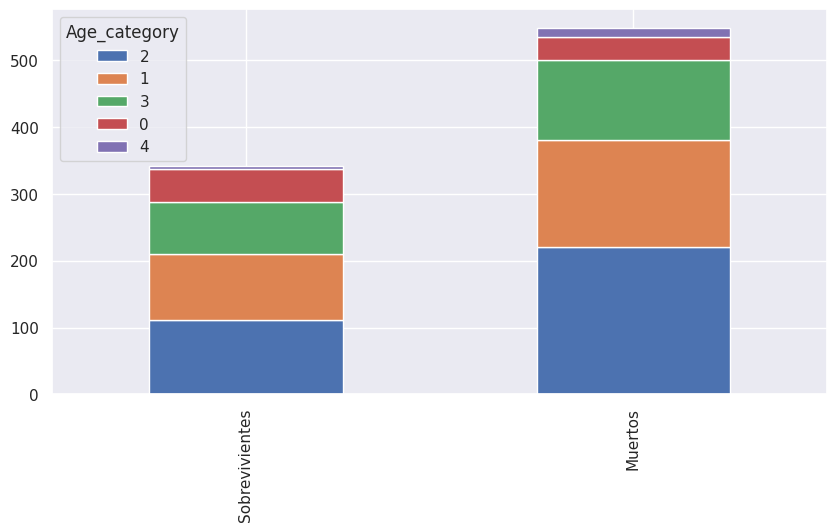

In [64]:
bar_char("Age_category")